# Prediction Reader

Maps WNV predictions from test dataset to plot and maps (for sanity check).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import bokeh

from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import CARTODBPOSITRON
from bokeh.models import ColumnDataSource, HoverTool

import math
from ast import literal_eval

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

%config InlineBackend.figure_format = 'retina'

In [2]:
# Read in test and submission files.

test = pd.read_csv('./assets/test.csv')
pred = pd.read_csv('./submission/submission_1537569752.csv')

In [3]:
# Concat data.
df = pd.concat([test, pred['WnvPresent']], axis=1)
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.set_index('Date', inplace=True)

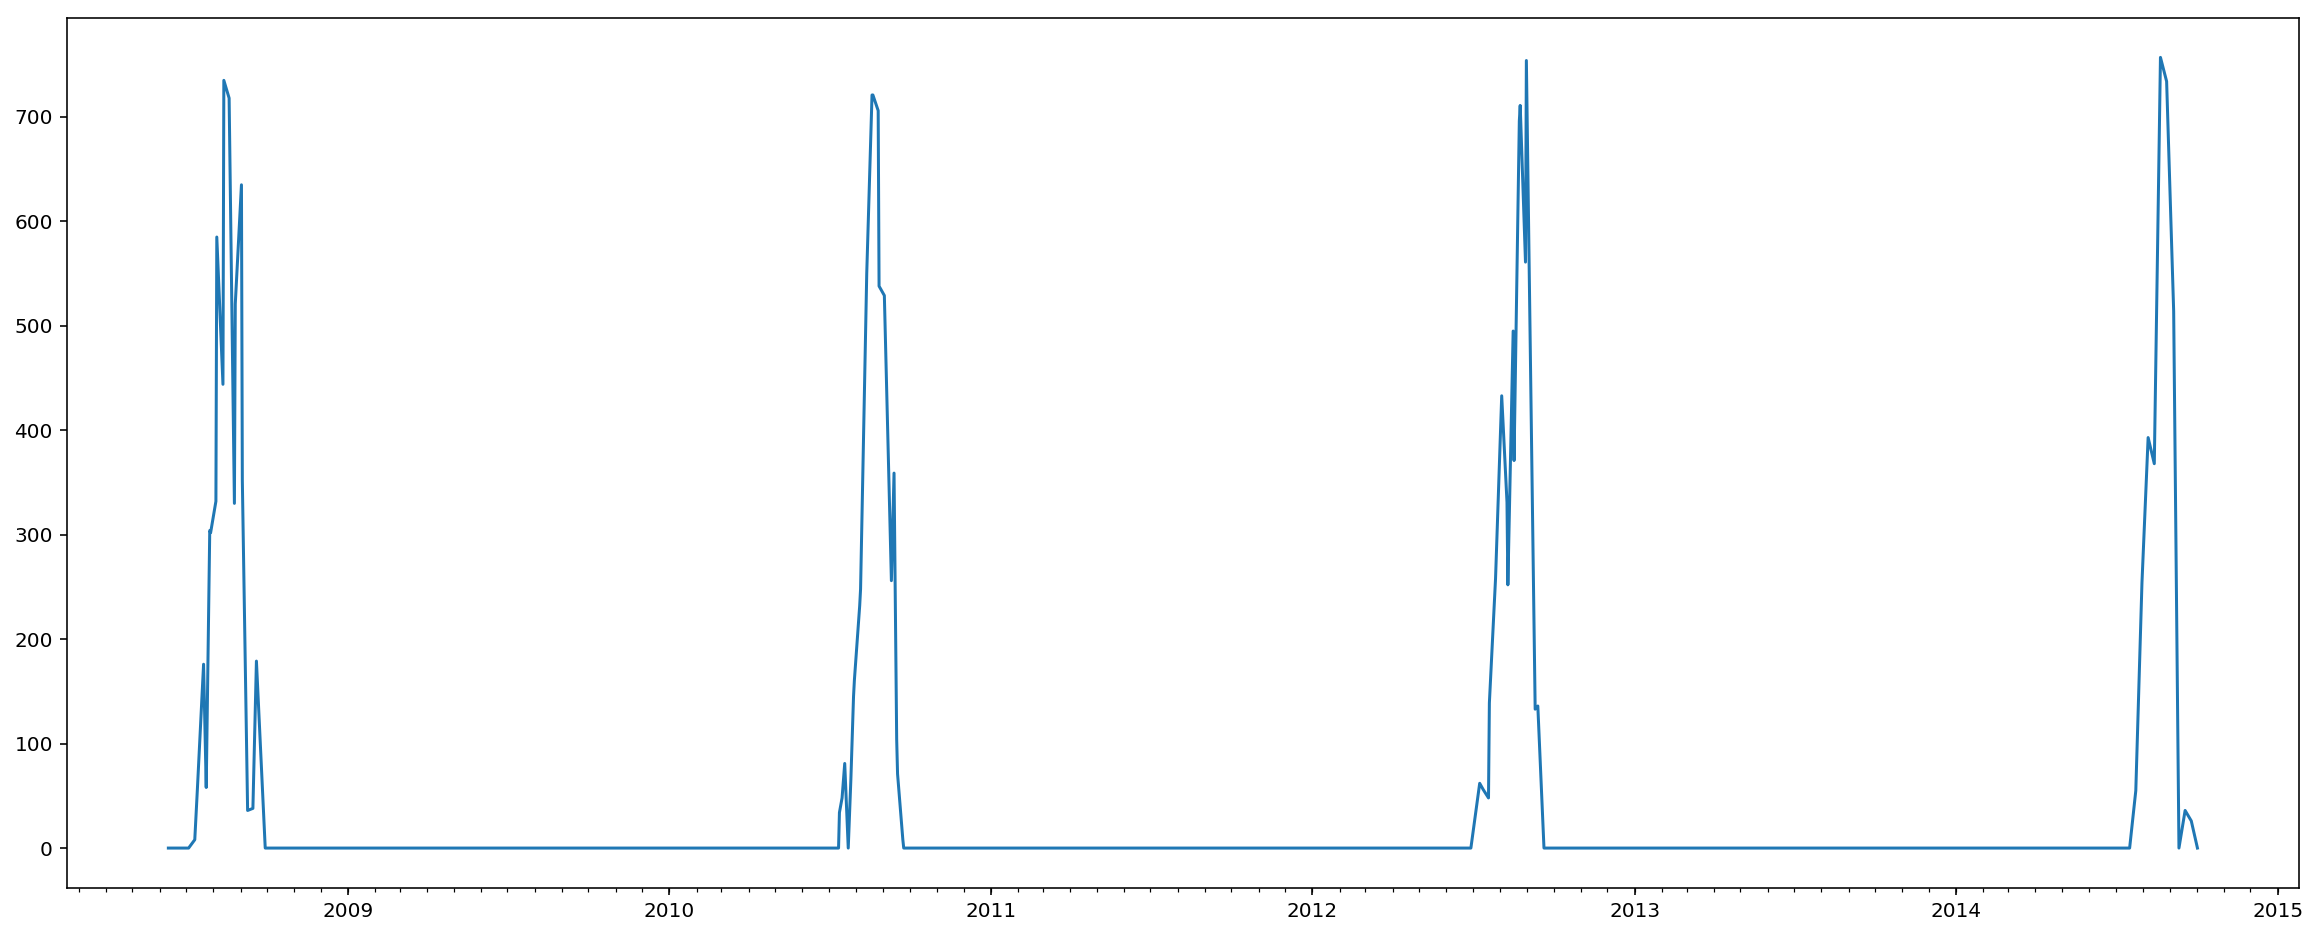

In [5]:
# Maps WNV predictions by date.
import matplotlib.dates as mdates
months = mdates.MonthLocator()  # every month

fig, ax = plt.subplots(figsize=(20,8))

ax.xaxis.set_minor_locator(months)
ax.plot(df['WnvPresent'].groupby(df.index).sum())

In [6]:
# this function converts latitude and longitude into plot coordinates bokeh can understand
def coords_to_plot(lat, lon):
    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + 
        lat * (math.pi/180.0)/2.0)) * scale
    return (x, y)

In [7]:
# Reads prediction map .csv if it exists, otherwise maps coords.
try:
    df = pd.read_csv('./assets/prediction_map.csv')
except:
    for x in df.index:
        df.loc[x, 'x_coord'] = coords_to_plot(df.loc[x, 'Latitude'], df.loc[x, 'Longitude'])[0]
        df.loc[x, 'y_coord'] = coords_to_plot(df.loc[x, 'Latitude'], df.loc[x, 'Longitude'])[1]

In [8]:
df.set_index('Date', inplace=True)

In [9]:
df.index = pd.to_datetime(df.index)

In [10]:
# # Saves to .csv so you don't have to run again.
# df.to_csv('./assets/prediction_map.csv')

In [11]:
# Maps WNV predictions by year.

for x in df.index.year.unique():
    
    ### slider ###

    year = x

    df_temp = df.loc[df.index.year == year]
    wnv = df_temp.loc[df_temp['WnvPresent'] > 0]
    df_temp = df_temp.loc[df_temp['WnvPresent'] == 0]

    # new map

    p = figure(x_range=(-9780000, -9745000), y_range=(5130000, 5160000),
               x_axis_type="mercator", y_axis_type="mercator")

    p.add_tile(CARTODBPOSITRON)

    p.circle(x = wnv['x_coord'],
             y = wnv['y_coord'],
             size=25,
             line_color="#FF0000", 
             fill_color="#FF0000",
             fill_alpha=0.005)
    
    print(year)

    output_notebook()
    show(p)

2008


Loading BokehJS ...

2010


Loading BokehJS ...

2012


Loading BokehJS ...

2014


Loading BokehJS ...